# BCR Non-standard Decomposition

This notebook demonstrates the non-standard wavelet decomposition which is a crucial component in fast numerical algorithms for matrix-vector multiplication proposed by G. Beylkin, R. Coifman, and V. Rokhlin. in their seminal paper "Fast wavelet transforms and numerical algorithms I. Communications on pure and applied mathematics, 44(2):141–183, 1991." 

In [1]:
import torch
import numpy as np
import os, sys
import pdb
import matplotlib.pyplot as plt
import math
from pytorch_wavelets import DWTForward, DWTInverse
%matplotlib inline

### Build the matrix to decompose

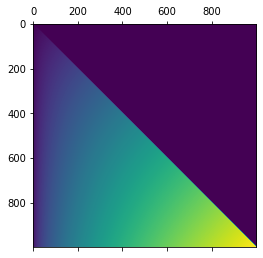

In [2]:
A = np.random.rand(1000,1000)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if i==j:
            A[i][j] = i+1
        elif i<j:
            A[i][j] = 0
        else:
            A[i][j] = math.sqrt(2.5*i+1)*math.sqrt(1.5*j+1)    # Some scaled value
plt.matshow(A)

In [3]:
weight = torch.from_numpy(A).float()
print(weight.shape)
print(weight.dtype)
print("Number of non-zero entries:",torch.count_nonzero(weight))

torch.Size([1000, 1000])
torch.float32
Number of non-zero entries: tensor(500500)


### Set up forward and inverse wavelet transform

In [4]:
fwd = DWTForward(J=6, mode='periodization', wave='db2')  # Accepts all wave types available to PyWavelets
inv = DWTInverse(mode='periodization', wave='db2')
Yl, Yh = fwd(weight.unsqueeze(0).unsqueeze(1))

In [5]:
recon_weight = inv((Yl, Yh))
print(recon_weight.shape)

torch.Size([1, 1, 1000, 1000])


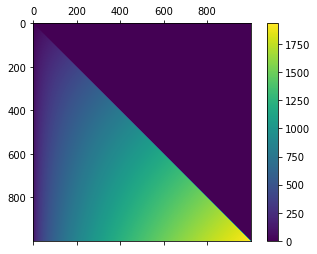

In [6]:
# Plot the reconstructed matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(recon_weight.squeeze().numpy(), interpolation='nearest')
fig.colorbar(cax)

We consider the original resolution as Level 0

#### Plotting utility function

In [7]:
def plot_level(level_detail, approx=None, all_four=False):
    fig, axs = plt.subplots(2,2)
    aa = axs[0,0].matshow(level_detail[0,0,0])
    fig.colorbar(aa,ax=axs[0,0])
    aa = axs[0,1].matshow(level_detail[0,0,1])
    fig.colorbar(aa,ax=axs[0,1])
    aa = axs[1,0].matshow(level_detail[0,0,2])
    fig.colorbar(aa,ax=axs[1,0])
    if all_four:
        aa = axs[1,1].matshow(approx)
        fig.colorbar(aa,ax=axs[1,1])
    else:
        fig.delaxes(axs[1][1])

### Check the different levels of decomposition, of the matrix

In [8]:
print("Yl",Yl.shape)
for i in range(len(Yh)):
    print("Yh",i,Yh[i].shape)

Yl torch.Size([1, 1, 16, 16])
Yh 0 torch.Size([1, 1, 3, 500, 500])
Yh 1 torch.Size([1, 1, 3, 250, 250])
Yh 2 torch.Size([1, 1, 3, 125, 125])
Yh 3 torch.Size([1, 1, 3, 63, 63])
Yh 4 torch.Size([1, 1, 3, 32, 32])
Yh 5 torch.Size([1, 1, 3, 16, 16])


### Level 1

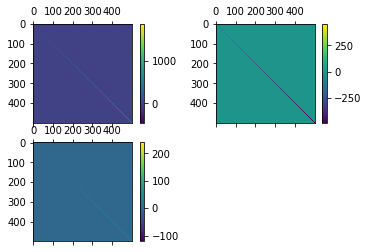

In [9]:
plot_level(Yh[0])

### Level 2

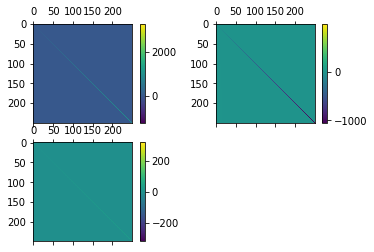

In [10]:
plot_level(Yh[1])

### Level 3

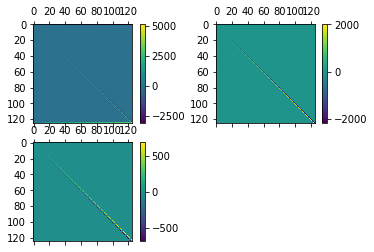

In [11]:
plot_level(Yh[2])

### Level 4

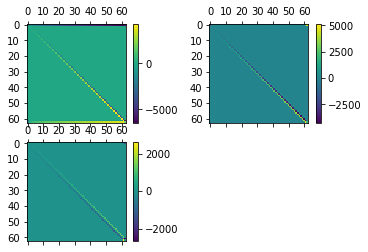

In [12]:
plot_level(Yh[3])

### Level 5

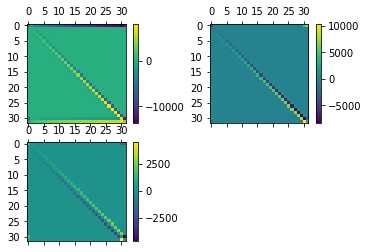

In [13]:
plot_level(Yh[4])

### Level 6 [The coarsest resolution]

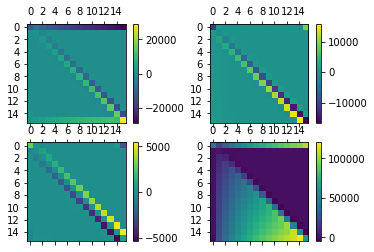

In [14]:
plot_level(Yh[5], approx=Yl[0,0], all_four=True)

One can observe the diagonally banded structure promiment in the different levels of decomposition. Please check the paper for more details!